# CDF to Calculate Probabilities

Use the human height data set: https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Data

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
females = df.loc[ df['Gender'] == 'Female'].copy()
females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [4]:
data = females['Height']
data

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 5000, dtype: float64

In [5]:
# calculate min, max, mean, and std
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)
print(mean, std, min, max)

63.708773603458006 2.6960143739062117 54.26313333 73.38958587


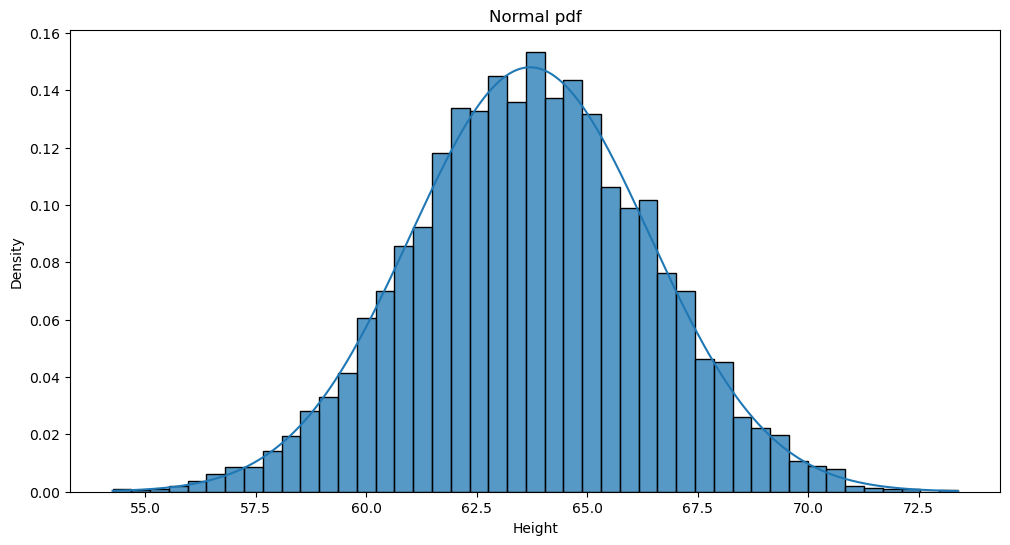

In [6]:
# normal pdf plot

# set the range and spacing for our normal curve
x_range = np.linspace(min, max, 1000)

# calculate pdf
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)

# plot
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');

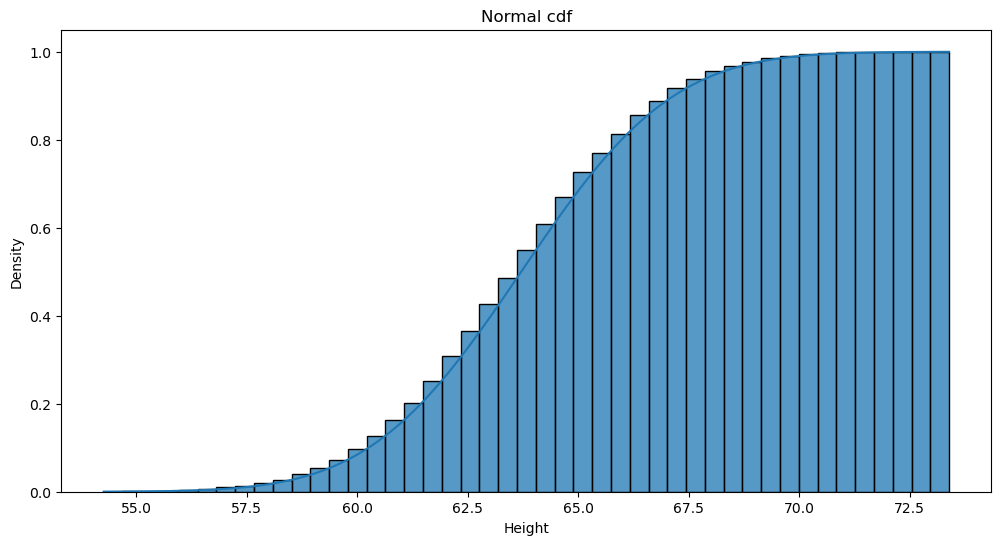

In [7]:
# normal cdf plot

# x_range already set above

# calculate cdf
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

# plot
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.set_title('Normal cdf');

# 3. Between 55 and 56 inches

In [8]:
# define range
low = 55.0
high = 56.0

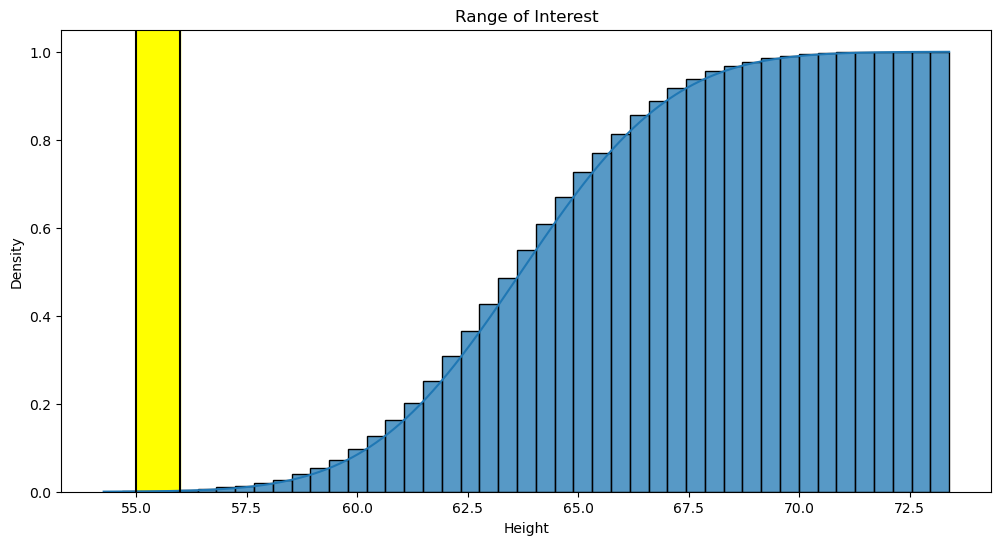

In [9]:
# visualize range in plot
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.axvline(low, color= 'black')
ax.axvline(high, color ='black')
ax.axvspan(low, high, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [10]:
# calculate probability of range
proba = stats.norm.cdf(high, loc=mean, scale=std) - stats.norm.cdf(low, loc=mean, scale=std)
proba

0.0015043054289559897

In [11]:
print(f"The probability of female height between {round(low, 0)} and {round(high, 0)} inches is {round((proba * 100), 2)}%.")

The probability of female height between 55.0 and 56.0 inches is 0.15%.


# 4. Less than 60 inches

In [12]:
# define range
low = min
high = 60

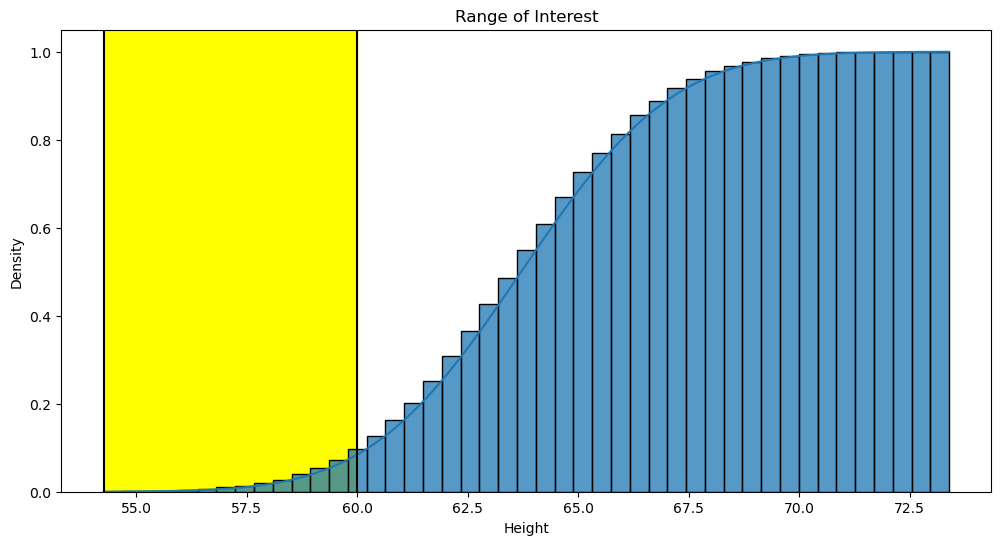

In [13]:
# visualize range in plot
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.axvline(low, color= 'black')
ax.axvline(high, color ='black')
ax.axvspan(low, high, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [14]:
# calculate probability
# giving only one value calculates all data below that value
proba = stats.norm.cdf(60, loc=mean,scale=std)
proba

# alternative: cdf(high) - cdf(low)
# stats.norm.cdf(high, loc=mean, scale=std) - stats.norm.cdf(low, loc=mean, scale=std)

0.08446492725207488

In [15]:
print(f"The probability of female height between {round(low, 0)} and {round(high, 0)} inches is {round((proba * 100), 2)}%.")

The probability of female height between 54.0 and 60 inches is 8.45%.


# 5. Greater than the mean

The answer by definition is 50%, but I will calculate here for practice.

In [16]:
# define range
low = mean
high = max

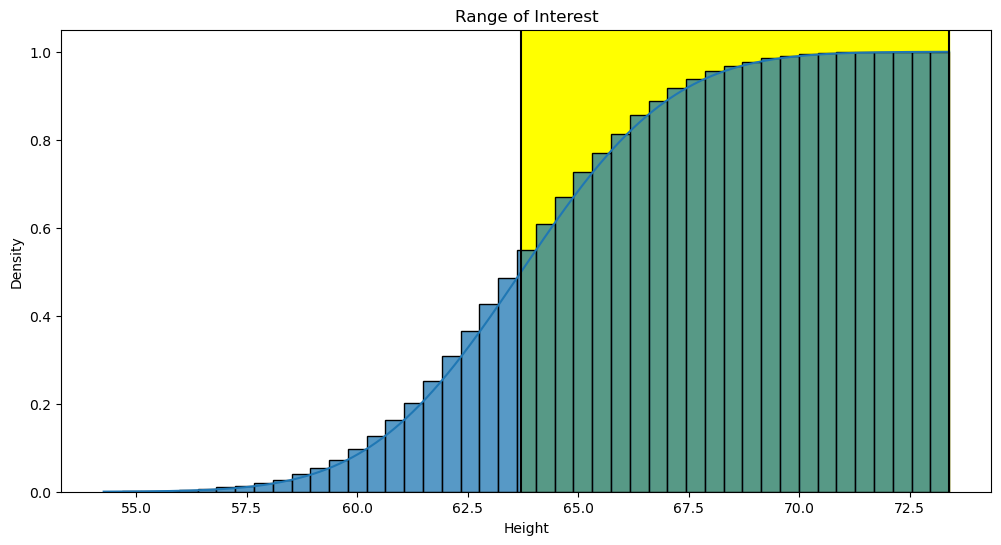

In [17]:
# visualize range in plot
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.axvline(low, color= 'black')
ax.axvline(high, color ='black')
ax.axvspan(low, high, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [18]:
# calculate probability
# subtracting from one calculates all data above the one given value
proba = 1 - stats.norm.cdf(mean, loc=mean,scale=std)
proba

# alternative: cdf(high) - cdf(low)
# stats.norm.cdf(high, loc=mean, scale=std) - stats.norm.cdf(low, loc=mean, scale=std)

0.5

In [19]:
print(f"The probability of female height between {round(low, 0)} and {round(high, 0)} inches is {round((proba * 100), 2)}%.")

The probability of female height between 64.0 and 73.0 inches is 50.0%.
